In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh 

In [2]:
PI = np.pi
n = 9
N = n**2
h_bar = 1.0
# omega_x = 80   # meV
# omega_y = 200  # meV
E_h = 27.2114  # eV
m_eff = 0.24   # m_e
omega_x = 0.08 / E_h
omega_y = 0.2 / E_h
alpha_x = h_bar / (m_eff * omega_x)
alpha_y = h_bar / (m_eff * omega_y)

delta_x = 2 # nm
a = delta_x*(n - 1)/2
x_k = np.arange(-a, a + delta_x, delta_x)  # shape = (n,)
y_k = np.arange(-a, a + delta_x, delta_x)  # shape = (n,)

In [8]:
def psi(x, y, x_i, y_i, alpha_x, alpha_y):
    return np.power(alpha_x*PI, -1/4) * np.exp(-(x-x_i)**2 / (2*alpha_x)) \
         * np.power(alpha_y*PI, -1/4) * np.exp(-(y-y_i)**2 / (2*alpha_y))

# --- mapowanie k -> (i, j) ---
def k_to_ij(k, n):
    i = k // n # to get the row index
    j = k % n  # to get the column index
    return i, j

def make_S_ij(x_i, y_i, x_j, y_j, alpha_x, alpha_y):
    S_ij = np.zeros((len(x_i), len(x_j)))
    np.exp(-(x_i[:, None] - x_j[None, :])**2 / (4 * alpha_x)
           -(y_i[:, None] - y_j[None, :])**2 / (4 * alpha_y),
           out=S_ij)
    return S_ij

def make_K_ij(x_i, y_i, x_j, y_j, alpha_x, alpha_y, S_ij):
    K_ij = np.zeros((len(x_i), len(x_j)))
    np.exp(((x_i[:, None] - x_j[None, :])**2 - 2*alpha_x) / (4 * alpha_x**2)
         + ((y_i[:, None] - y_j[None, :])**2 - 2*alpha_y) / (4 * alpha_y**2),
           out=K_ij)
    K_ij *= -1/(2*m_eff) * S_ij
    return K_ij

def make_V_ij(x_i, y_i, x_j, y_j, alpha_x, alpha_y, omega_x, omega_y, S_ij):
    V_ij = np.zeros((len(x_i), len(x_j)))
    np.exp(0.25(omega_x**2 * ((x_i[:, None] + x_j[None,:])**2 + 2*alpha_x) \
              + omega_y**2 * ((y_i[:, None] + y_j[None,:])**2 + 2*alpha_y))
         , out=V_ij)
    V_ij *= 0.5*m_eff * S_ij
    return V_ij

<>:28: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_7107/2769039298.py:28: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  np.exp(0.25(omega_x**2 * ((x_i[:, None] + x_j[None,:])**2 + 2*alpha_x) \


In [ ]:
# x_k = np.arange(-a, a + delta_x, delta_x)  # shape = (n,)
# y_k = np.arange(-a, a + delta_x, delta_x)  # shape = (n,)

# x_k[:, None] - y_k[None, :]
# print("x_k:", x_k)
# print("y_k:", y_k)
# print()
# print("x_k[:, None] - y_k[None, :]:")
# print()
# print(x_k[:, None] - y_k[None, :])
# ii, jj = k_to_ij(0, 9)
# print(f"k_to_ij(0, 9):", ii, jj)

x_k: [-8. -6. -4. -2.  0.  2.  4.  6.  8.]
y_k: [-8. -6. -4. -2.  0.  2.  4.  6.  8.]

x_k[:, None] - y_k[None, :]:

[[  0.  -2.  -4.  -6.  -8. -10. -12. -14. -16.]
 [  2.   0.  -2.  -4.  -6.  -8. -10. -12. -14.]
 [  4.   2.   0.  -2.  -4.  -6.  -8. -10. -12.]
 [  6.   4.   2.   0.  -2.  -4.  -6.  -8. -10.]
 [  8.   6.   4.   2.   0.  -2.  -4.  -6.  -8.]
 [ 10.   8.   6.   4.   2.   0.  -2.  -4.  -6.]
 [ 12.  10.   8.   6.   4.   2.   0.  -2.  -4.]
 [ 14.  12.  10.   8.   6.   4.   2.   0.  -2.]
 [ 16.  14.  12.  10.   8.   6.   4.   2.   0.]]
k_to_ij(0, 9): 0 0


In [22]:
print('x_k[:, None]')
print(x_k[:, None])

print('y_k[None,:]')
print(y_k[None, :])

print('x_k[:, None] + y_k[None,:]')
print(x_k[:, None] + y_k[None,:])

x_k[:, None]
[[-8.]
 [-6.]
 [-4.]
 [-2.]
 [ 0.]
 [ 2.]
 [ 4.]
 [ 6.]
 [ 8.]]
y_k[None,:]
[[-8. -6. -4. -2.  0.  2.  4.  6.  8.]]
x_k[:, None] + y_k[None,:]
[[-16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.]
 [-14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.]
 [-12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.]
 [ -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.]
 [ -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [ -4.  -2.   0.   2.   4.   6.   8.  10.  12.]
 [ -2.   0.   2.   4.   6.   8.  10.  12.  14.]
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.]]


In [28]:
# --- generujemy siatkę do rysowania ---
X, Y = np.meshgrid(
    np.linspace(-a, a, 200),
    np.linspace(-a, a, 200)
)
# print('X[:, None]')
# print(X)

# print('Y[None,:]')
# print(Y[None, :])

print('X[:, None] + Y[None,:]')
print(np.round(X + Y, 2))

X[:, None] + Y[None,:]
[[-16.   -15.92 -15.84 ...  -0.16  -0.08   0.  ]
 [-15.92 -15.84 -15.76 ...  -0.08   0.     0.08]
 [-15.84 -15.76 -15.68 ...   0.     0.08   0.16]
 ...
 [ -0.16  -0.08   0.   ...  15.68  15.76  15.84]
 [ -0.08   0.     0.08 ...  15.76  15.84  15.92]
 [  0.     0.08   0.16 ...  15.84  15.92  16.  ]]


In [32]:
# np.shape(X + Y)
np.shape(x_k[:, None] + y_k[None,:])

(9, 9)

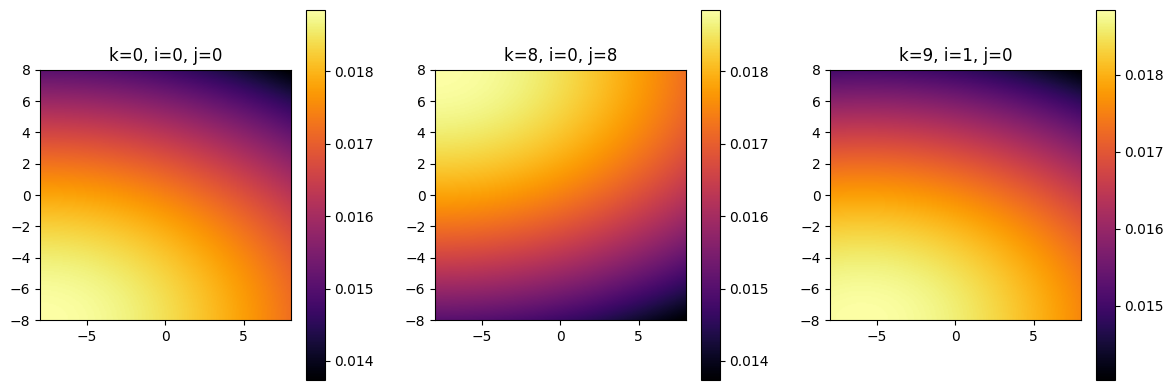

In [ ]:
# --- generujemy siatkę do rysowania ---
X, Y = np.meshgrid(
    np.linspace(-a, a, 200),
    np.linspace(-a, a, 200)
)

# --- wybieramy przykładowe indeksy ---
ks = [0, 8, 9]

plt.figure(figsize=(12, 4))

for idx, k in enumerate(ks, 1):
    i, j = k_to_ij(k, n)
    x0 = x_k[i]
    y0 = y_k[j]
    Z = psi(X, Y, x0, y0, alpha_x, alpha_y)

    ax = plt.subplot(1, 3, idx)
    im = ax.imshow(Z, extent=(X.min(), X.max(), Y.min(), Y.max()),
                   origin='lower', cmap='inferno', aspect='equal', vmin=Z.min(), vmax=Z.max())
    ax.set_title(f"k={k}, i={i}, j={j}")
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [5]:
x = np.linspace(-a, a, 100)          # shape = (100,)
y = np.linspace(-a, a, 100)[:, None] # shape = (100, 1)

In [59]:
# plt.figure(figsize=(6,5))
# plt.imshow(psi_vec, extent=(-5, 5, -5, 5), origin='lower', aspect='auto', cmap='viridis')
# plt.colorbar(label=r'$\psi(x,y)$')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Przykładowa funkcja psi")
# plt.show()

In [13]:
# # !pip install -q plotly
# import plotly.graph_objects as go

# X, Y = np.meshgrid(x, x)
# state = 'none'
# # Wartość do wykresu - część rzeczywista lub moduł^2
# Z = psi_vec

# surface = go.Surface(
#     x=X,
#     y=Y,
#     z=Z,
#     colorscale='Viridis',
#     colorbar=dict(title='Re(Ψ)'),
#     showscale=True,
#     name=f'State {state}'
# )

# fig = go.Figure(data=[surface])

# fig.update_layout(
#     title=f'Wykres 3D funkcji falowej stanu n={state}',
#     scene=dict(
#         xaxis_title='$z_1$',
#         yaxis_title='$z_2$',
#         zaxis_title='Re(Ψ)',  # lub '|Ψ|²' jeśli używasz modułu
#     ),
#     width=800,
#     height=700
# )

# fig.show()